In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import figure
import matplotlib.dates as mdates
import json

# Load of Data

In [3]:
PATH_ROOT = '/content/drive/MyDrive/EPFL/ADA'
PATH_PARQUET = PATH_ROOT + '/Project datasets'
PATH_QUOTEBANK = PATH_ROOT + '/Quotebank'
PATH_TO_QUOTES = PATH_QUOTEBANK + '/quotes-{year}.json.bz2'

## Load of Quotebank

In [4]:
path_new_file = '/content/drive/MyDrive/EPFL/ADA/NYT/quotes_nyt.json'
df = pd.read_json(path_new_file, orient='index')
df.head()

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase
0,2020-02-18-004289,an appetite for power.,None,[],2020-02-18 14:44:45,3,"[[None, 0.3665], [Robin Niblett, 0.3339], [Jos...","[https://hypervocal.com/items/3249757, https:/...",E
1,2020-01-09-006199,Andrew Yang's Lies About Supporting Medicare f...,Andrew Yang,"[Q11118258, Q28723576]",2020-01-09 01:21:54,2,"[[Andrew Yang, 0.7197], [None, 0.2804]]",[https://www.nytimes.com/2020/01/08/opinion/me...,E
2,2020-01-22-017789,eager to erase the image of congressional Repu...,Eric Cantor,[Q497271],2020-01-22 21:20:52,2,"[[Eric Cantor, 0.5013], [None, 0.3045], [Kevin...",[http://mobile.nytimes.com/2020/01/22/us/polit...,E
3,2020-01-31-022641,Given the partisan nature of this impeachment ...,Lisa Murkowski,[Q22360],2020-01-31 00:00:00,24,"[[Lisa Murkowski, 0.6433], [None, 0.224], [Joh...",[http://feeds.foxnews.com/~r/foxnews/politics/...,E
4,2020-01-23-024008,"He got on top of me, and he raped me.",Annabella Sciorra,[Q231395],2020-01-23 00:00:00,75,"[[Annabella Sciorra, 0.5251], [Harvey Weinstei...",[https://www.rawstory.com/2020/01/sopranos-act...,E


In [5]:
df.drop(['phase'], axis=1, inplace = True)
df.head()

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls
0,2020-02-18-004289,an appetite for power.,None,[],2020-02-18 14:44:45,3,"[[None, 0.3665], [Robin Niblett, 0.3339], [Jos...","[https://hypervocal.com/items/3249757, https:/..."
1,2020-01-09-006199,Andrew Yang's Lies About Supporting Medicare f...,Andrew Yang,"[Q11118258, Q28723576]",2020-01-09 01:21:54,2,"[[Andrew Yang, 0.7197], [None, 0.2804]]",[https://www.nytimes.com/2020/01/08/opinion/me...
2,2020-01-22-017789,eager to erase the image of congressional Repu...,Eric Cantor,[Q497271],2020-01-22 21:20:52,2,"[[Eric Cantor, 0.5013], [None, 0.3045], [Kevin...",[http://mobile.nytimes.com/2020/01/22/us/polit...
3,2020-01-31-022641,Given the partisan nature of this impeachment ...,Lisa Murkowski,[Q22360],2020-01-31 00:00:00,24,"[[Lisa Murkowski, 0.6433], [None, 0.224], [Joh...",[http://feeds.foxnews.com/~r/foxnews/politics/...
4,2020-01-23-024008,"He got on top of me, and he raped me.",Annabella Sciorra,[Q231395],2020-01-23 00:00:00,75,"[[Annabella Sciorra, 0.5251], [Harvey Weinstei...",[https://www.rawstory.com/2020/01/sopranos-act...


In [ ]:
df['quoteID'].count()

635130

In [ ]:
df.describe()

,numOccurrences
count,635130.000000
mean,18.477490
std,169.875859
min,1.000000
25%,2.000000
50%,3.000000
75%,8.000000
max,61029.000000


In [ ]:
if(~df['quoteID'].is_unique):
    df.drop_duplicates(subset=['quoteID'], inplace=True)

In [ ]:
df['quoteID'].count()

635130

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe90419ec90>]],
      dtype=object)

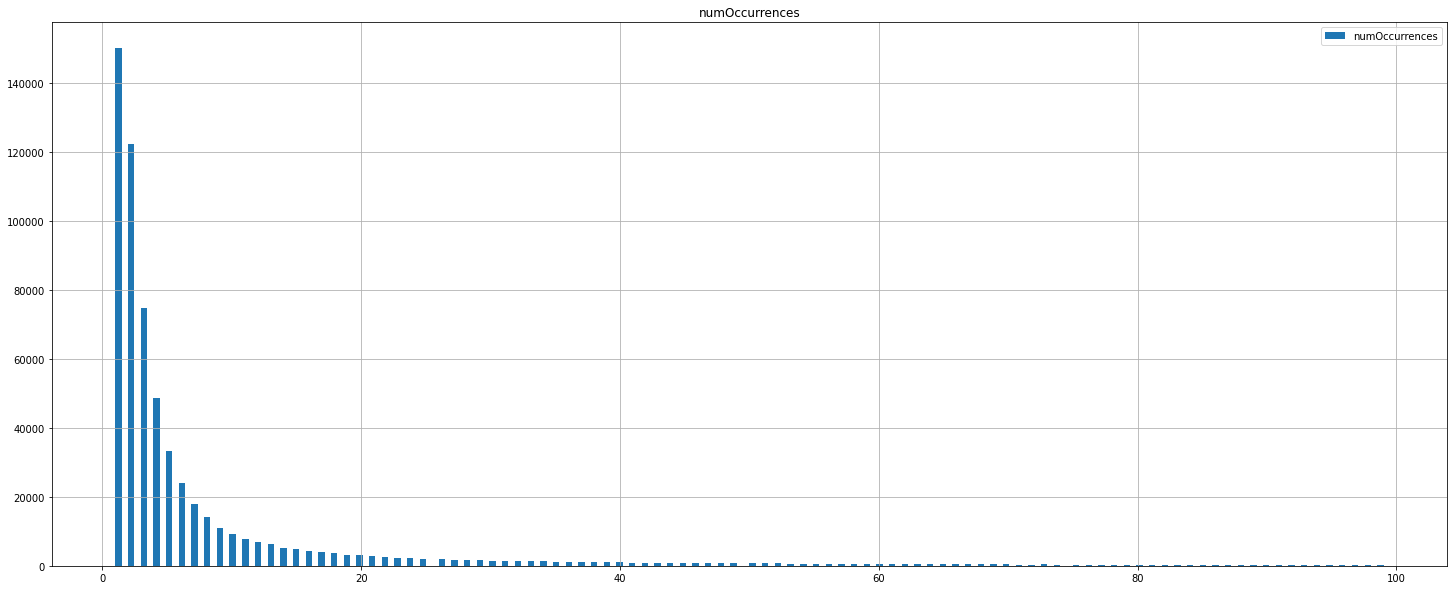

In [ ]:
df[df.numOccurrences<100].hist(bins = 200, figsize = (25,10), legend=True)

In [9]:
df['speaker'].value_counts()

None                      224597
President Donald Trump      6169
President Trump             4675
Donald Trump                4005
Hillary Clinton             1421
                           ...  
Richie Havens                  1
Mohammed Omer                  1
Diane Simpson                  1
Matthew Barlow                 1
Richard M. Bowen III           1
Name: speaker, Length: 62730, dtype: int64

## Load of wikidata set

In [ ]:
wiki_quotation = pd.read_csv(PATH_PARQUET + '/wikidata_labels_descriptions_quotebank.csv.bz2', compression='bz2', index_col='QID')

In [ ]:
wiki_quotation.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36969 entries, Q31 to Q106376887
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Label        32951 non-null  object
 1   Description  24542 non-null  object
dtypes: object(2)
memory usage: 866.5+ KB


In [ ]:
wiki_quotation.head()

,Label,Description
QID,,
Q31,Belgium,country in western Europe
Q45,Portugal,country in southwestern Europe
Q75,Internet,global system of connected computer networks
Q148,People's Republic of China,sovereign state in East Asia
Q155,Brazil,country in South America


## Load of speaker dataset


In [6]:
df_speakers = pd.read_parquet(PATH_PARQUET + '/speaker_attributes.parquet')
#df_speakers.set_index(keys='id', inplace=True)

In [ ]:
df_speakers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9055981 entries, Q23 to Q106406643
Data columns (total 14 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   aliases             object
 1   date_of_birth       object
 2   nationality         object
 3   gender              object
 4   lastrevid           int64 
 5   ethnic_group        object
 6   US_congress_bio_ID  object
 7   occupation          object
 8   party               object
 9   academic_degree     object
 10  label               object
 11  candidacy           object
 12  type                object
 13  religion            object
dtypes: int64(1), object(13)
memory usage: 1.0+ GB


In [ ]:
df_speakers.head()

,aliases,date_of_birth,nationality,gender,lastrevid,ethnic_group,US_congress_bio_ID,occupation,party,academic_degree,id,label,candidacy,type,religion
0,"[Washington, President Washington, G. Washingt...",[+1732-02-22T00:00:00Z],"[Q161885, Q30]",[Q6581097],1395141751,None,W000178,"[Q82955, Q189290, Q131512, Q1734662, Q294126, ...",[Q327591],None,Q23,George Washington,"[Q698073, Q697949]",item,[Q682443]
1,"[Douglas Noel Adams, Douglas Noël Adams, Dougl...",[+1952-03-11T00:00:00Z],[Q145],[Q6581097],1395737157,[Q7994501],None,"[Q214917, Q28389, Q6625963, Q4853732, Q1884422...",None,None,Q42,Douglas Adams,None,item,None
2,"[Paul Marie Ghislain Otlet, Paul Marie Otlet]",[+1868-08-23T00:00:00Z],[Q31],[Q6581097],1380367296,None,None,"[Q36180, Q40348, Q182436, Q1265807, Q205375, Q...",None,None,Q1868,Paul Otlet,None,item,None
3,"[George Walker Bush, Bush Jr., Dubya, GWB, Bus...",[+1946-07-06T00:00:00Z],[Q30],[Q6581097],1395142029,None,None,"[Q82955, Q15982858, Q18814623, Q1028181, Q1408...",[Q29468],None,Q207,George W. Bush,"[Q327959, Q464075, Q3586276, Q4450587]",item,"[Q329646, Q682443, Q33203]"
4,"[Velázquez, Diego Rodríguez de Silva y Velázqu...",[+1599-06-06T00:00:00Z],[Q29],[Q6581097],1391704596,None,None,[Q1028181],None,None,Q297,Diego Velázquez,None,item,None


In [ ]:
df_speakers[df_speakers.id == 'Q22360']

,aliases,date_of_birth,nationality,gender,lastrevid,ethnic_group,US_congress_bio_ID,occupation,party,academic_degree,id,label,candidacy,type,religion
3398127,[Lisa Ann Murkowski],[+1957-05-22T00:00:00Z],[Q30],[Q6581072],1392288800,None,M001153,"[Q82955, Q40348]",[Q29468],None,Q22360,Lisa Murkowski,None,item,[Q9592]


In [7]:
df_speakers[df_speakers.label == 'Donald Trump']

,aliases,date_of_birth,nationality,gender,lastrevid,ethnic_group,US_congress_bio_ID,occupation,party,academic_degree,id,label,candidacy,type,religion
2267061,"[Donald John Trump, Donald J. Trump, Trump, Th...",[+1946-06-14T00:00:00Z],[Q30],[Q6581097],1395141850,None,None,"[Q911554, Q557880, Q3427922, Q15980158, Q13152...","[Q29468, Q1897793, Q29552, Q29468, Q29468]",[Q787674],Q22686,Donald Trump,"[Q699872, Q22923830, Q38051523]",item,[Q178169]
8337605,"[Donald L. Trump, Donald Lynn Trump, Skip Trum...","[+1945-07-31T00:00:00Z, +1945-00-00T00:00:00Z]",[Q30],[Q6581097],1392088288,None,None,"[Q39631, Q16062369]",None,[Q913404],Q27947481,Donald Trump,None,item,None


In [10]:
df[df.qids == 'Q22360']

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls
